In [3]:
! pip install -U chainer==2.0

  Running setup.py bdist_wheel for chainer: started
  Running setup.py bdist_wheel for chainer: finished with status 'done'
  Stored in directory: C:\Users\Ritor\AppData\Local\pip\Cache\wheels\92\0b\04\07fbdc2fb55c187f7ec110af7fa2b12d0087bb0452730cd1f3
Successfully built chainer


In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [7]:
pip install h5py==2.8.0rc1


The following command must be run outside of the IPython shell:

    $ pip install h5py==2.8.0rc1

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [2]:
import chainer
import chainer.functions as F
import chainer.links as L
from chainer import computational_graph
from chainer import serializers

In [4]:
#データセットをインストール
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original',data_home='.')

In [5]:
#fetch_mldata関数　=　(ダウンロードするデータ, 保存先)

In [6]:
#確認
pic_data = mnist.data
pic_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
ans_data = mnist.target
ans_data

array([0., 0., 0., ..., 9., 9., 9.])

In [8]:
#数値をChainer用に変換
pic_data = pic_data.astype(np.float32)
ans_data = ans_data.astype(np.int32)

In [9]:
pic_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
pic_data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [11]:
pic_data /= 255.

In [12]:
pic_data.shape

(70000, 784)

In [14]:
ans_data.shape

(70000,)

In [3]:
# データを画像として出力する関数
def draw_digit(data):
    """数値の行列データを画像表示"""
    plt.figure(figsize=(3, 3))
    X, Y = np.meshgrid(range(28),range(28))
    Z = data.reshape(28, 28)
    Z = Z[::-1,:]
    plt.pcolor(X, Y, Z)
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")
    plt.gray()
    plt.show()

In [16]:
index = 50000
draw_digit(pic_data[index])

In [17]:
#分析に入る

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pic_data, ans_data, test_size=0.3, random_state=0)

In [19]:
train_num = len(x_train)
train_num

49000

In [20]:
test_num = len(x_test)
test_num

21000

In [4]:
#ニューラルネットワークの構築
#4層
#chainer のchainクラスを継承

class MLP(chainer.Chain):
    #ニューラルネットの構造を定義
    def __init__(self):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(784, 900)
            self.l2 = L.Linear(900, 1000)
            self.l3 = L.Linear(1000, 500)
            self.l4 = L.Linear(500, 10)
    #ニューラルネットの計算規則を定義       
    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        h3 = F.relu(self.l3(h2))
        return self.l4(h3)
        

In [5]:
#分類器インスタンスの生成
#Classifierクラスは定義したニューラルネットを分類器として簡単に利用するためクラス
#MLPクラスのインスタンスを引数として渡す

model = L.Classifier(MLP())

In [23]:
#ここでGPUの利用ができる
#今回はなし
gpu = -1

In [24]:
#cupy(GPU処理では利用するライブラリ)の使用の有無

if gpu >= 0:
    xp = cuda.cupy
    cupy.cuda.Device(gpu).use()
    model.to_gpu()
else:
    xp = np

In [25]:
# optimizer(最適化)の定義
optimizer = chainer.optimizers.SGD() #今回はSGDを利用
optimizer.setup(model) #モデルを読み込ませる

In [26]:
#バッチ数の指定（データを学習に使うときの使い方）
#今回はミニバッチ学習を利用
#ミニバッチに含まれるサンプル数を指定
#今回はデータからサンプル数を100こずつ取り出して学習

batch_size = 100

In [27]:
#epoch数（学習の繰り返し数）
n_epoch = 20

In [28]:
#ここから学習に入る
#[注意]本当はたくさんの理論の上に学習が成立するが、コードの上ではモジュールを利用するため数行で終わってしまう。


In [29]:
from chainer.datasets import tuple_dataset
from chainer import iterators, training
from chainer.training import extensions

In [30]:
#最初にtrainデータをTupleDataset というchainer独特の型に変換する必要あり

train = tuple_dataset.TupleDataset(x_train, y_train)

In [31]:
#次にtrainデータとbatch_sizeを引き渡してtrain_iterにする（また独自の型に変換有）
#shuffleをtrueにすることで「データからbatch_sizeごとにランダムにデータをサンプリングするということができる」
#iterator = 集合的データ構造

train_iter = iterators.SerialIterator(train, batch_size=batch_size, shuffle=True)

In [32]:
#Updater = 「どのデータを参照して、どのようなモデルと最適化手法で」パラメータを更新するか
#ここもGPUかCPUか指定あり

updater = training.StandardUpdater(train_iter, optimizer, device=gpu)

In [35]:
#trainer には「学習規則（updater）と学習回数(n_epoch)と学習結果の保存先(out)を引数にする
#trainer = 「どのような更新規則の学習を」「何回繰り返して」「結果をどこに報告するのか」

trainer = training.Trainer(updater, (n_epoch, 'epoch'), out='result')

In [36]:
#ここからは追加機能（学習したモデルの評価とか）

In [38]:
# testデータをTupleDatasetに変換
test = tuple_dataset.TupleDataset(x_test,y_test)

In [39]:
# test_iterを生成
test_iter = iterators.SerialIterator(test, batch_size=batch_size ,shuffle=False, repeat=False)

In [40]:
# Evaluatorクラスをtrainerに登録しておく
trainer.extend(extensions.Evaluator(test_iter, model))

In [41]:
# ログファイルを作成する機能を追加
trainer.extend(extensions.LogReport())

In [42]:
# 学習状況の報告を逐一出力する機能を追加
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'main/accuracy', 'validation/main/loss','validation/main/accuracy']))

In [43]:
# trainとtestの精度のグラフを出力
trainer.extend(extensions.PlotReport(['main/accuracy', 'validation/main/accuracy'],
                          'epoch', file_name='accuracy.png'))
# trainとtestの損失関数のグラフを出力
trainer.extend(extensions.PlotReport(['main/loss', 'validation/main/loss'],
                          'epoch', file_name='loss.png'))

In [44]:
#指定した内容で学習を実行
trainer.run()

epoch       main/loss   main/accuracy  validation/main/loss  validation/main/accuracy
1           1.28184     0.725694       0.552933              0.862                     
2           0.436088    0.884184       0.366889              0.896286                  
3           0.333252    0.90598        0.30984               0.912571                  
4           0.290701    0.917184       0.281633              0.920619                  
5           0.263198    0.924122       0.256995              0.92781                   
6           0.241348    0.930694       0.24343               0.930238                  
7           0.223927    0.936204       0.229187              0.934667                  
8           0.208193    0.941286       0.215192              0.938905                  
9           0.194666    0.944796       0.203972              0.941667                  
10          0.182704    0.947939       0.193971              0.944143                  
11          0.172082    0.951571  

In [45]:
#学習結果の確認

In [46]:
# ReportPlotによるグラフを出力する関数
from pylab import box
def show_graph(src):
    img =  plt.imread(src)
    xpixels,ypixels = img.shape[0],img.shape[1]
    dpi = 100
    margin = 0.01
    figsize = (1 + margin) * ypixels / dpi, (1 + margin) * xpixels / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    ax.tick_params(labelbottom="off",bottom="off")
    ax.tick_params(labelleft="off",left="off")

    ax.imshow(img, interpolation='none')
    box("off")
    plt.show()

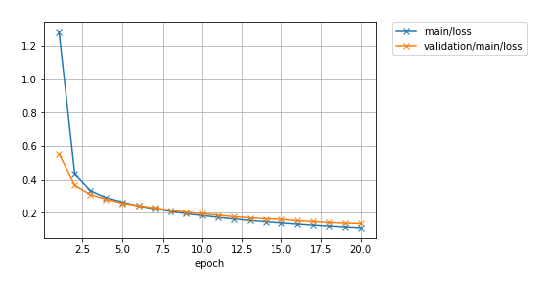

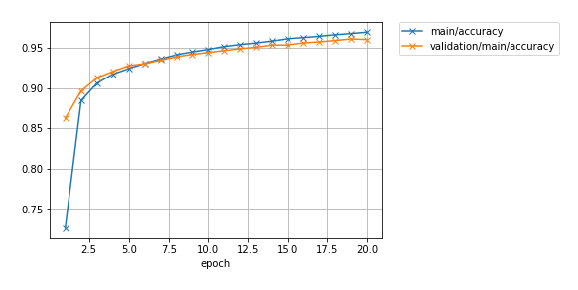

In [47]:
show_graph('result/loss.png')
show_graph('result/accuracy.png')

In [48]:
#モデルの保存と復元
#学習させたモデルは停止の度に初期化されるので注意

In [35]:
#(ファイル名, 保存したいモデルの変数名)
serializers.save_npz('mnist.npz', model)
print('Saved the model')

Saved the model


In [50]:
#パラメータをndarrayで保存し拡張子は.npz

In [36]:
# モデルの読込
# (ファイル名, 読み込みたいモデルに与える変数名)
serializers.load_npz('mnist.npz', model)
print('Loaded the model.')

Loaded the model.


In [53]:
model

In [54]:
#ここから自分の画像を評価してもらう

In [7]:
from PIL import Image
import numpy as np

In [8]:
img = Image.open("num_3.jpg")
img.show()

In [82]:
img_re = img.convert("L").resize((28,28))

In [85]:
img_re_ = np.asarray(img_re, dtype=np.float32)/255

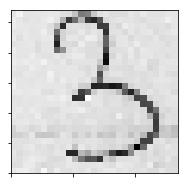

In [86]:
draw_digit(img_re_)

In [89]:
#backgroundが白だから
img_re_ = 1 - img_re_ 

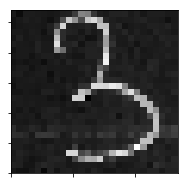

In [90]:
draw_digit(img_re_)

In [91]:
img_re_.shape

(28, 28)

In [93]:
img_re_

array([[0.3215686 , 0.32941175, 0.31764704, 0.33725488, 0.32941175,
        0.33725488, 0.32549018, 0.31372547, 0.32549018, 0.32549018,
        0.3215686 , 0.32549018, 0.3333333 , 0.3215686 , 0.29411763,
        0.32941175, 0.3215686 , 0.32549018, 0.34509802, 0.3333333 ,
        0.3333333 , 0.33725488, 0.32549018, 0.33725488, 0.32941175,
        0.31764704, 0.32941175, 0.3215686 ],
       [0.32549018, 0.29411763, 0.32941175, 0.32941175, 0.32549018,
        0.3215686 , 0.31764704, 0.3215686 , 0.33725488, 0.34117645,
        0.39999998, 0.5568627 , 0.54117644, 0.38823527, 0.3333333 ,
        0.32549018, 0.34117645, 0.34117645, 0.34509802, 0.32549018,
        0.33725488, 0.31764704, 0.3333333 , 0.3333333 , 0.3333333 ,
        0.32549018, 0.32549018, 0.3333333 ],
       [0.3098039 , 0.3215686 , 0.3333333 , 0.32549018, 0.32941175,
        0.31764704, 0.30196077, 0.32941175, 0.43921566, 0.7019608 ,
        0.58431375, 0.4352941 , 0.7019608 , 0.745098  , 0.6431372 ,
        0.3490196 , 0.3333

In [96]:
train_img = []
for x in range(28):
    for y in range(28):
        train_img.append(img_re_[x, y])

train_img

[0.3215686,
 0.32941175,
 0.31764704,
 0.33725488,
 0.32941175,
 0.33725488,
 0.32549018,
 0.31372547,
 0.32549018,
 0.32549018,
 0.3215686,
 0.32549018,
 0.3333333,
 0.3215686,
 0.29411763,
 0.32941175,
 0.3215686,
 0.32549018,
 0.34509802,
 0.3333333,
 0.3333333,
 0.33725488,
 0.32549018,
 0.33725488,
 0.32941175,
 0.31764704,
 0.32941175,
 0.3215686,
 0.32549018,
 0.29411763,
 0.32941175,
 0.32941175,
 0.32549018,
 0.3215686,
 0.31764704,
 0.3215686,
 0.33725488,
 0.34117645,
 0.39999998,
 0.5568627,
 0.54117644,
 0.38823527,
 0.3333333,
 0.32549018,
 0.34117645,
 0.34117645,
 0.34509802,
 0.32549018,
 0.33725488,
 0.31764704,
 0.3333333,
 0.3333333,
 0.3333333,
 0.32549018,
 0.32549018,
 0.3333333,
 0.3098039,
 0.3215686,
 0.3333333,
 0.32549018,
 0.32941175,
 0.31764704,
 0.30196077,
 0.32941175,
 0.43921566,
 0.7019608,
 0.58431375,
 0.4352941,
 0.7019608,
 0.745098,
 0.6431372,
 0.3490196,
 0.3333333,
 0.32549018,
 0.32941175,
 0.32941175,
 0.33725488,
 0.34509802,
 0.32941175,


In [98]:
#上のはnp対応になってない？
#だから、それを変更する必要あり

train_img = np.array(train_img)

In [99]:
train_img

array([0.3215686 , 0.32941175, 0.31764704, 0.33725488, 0.32941175,
       0.33725488, 0.32549018, 0.31372547, 0.32549018, 0.32549018,
       0.3215686 , 0.32549018, 0.3333333 , 0.3215686 , 0.29411763,
       0.32941175, 0.3215686 , 0.32549018, 0.34509802, 0.3333333 ,
       0.3333333 , 0.33725488, 0.32549018, 0.33725488, 0.32941175,
       0.31764704, 0.32941175, 0.3215686 , 0.32549018, 0.29411763,
       0.32941175, 0.32941175, 0.32549018, 0.3215686 , 0.31764704,
       0.3215686 , 0.33725488, 0.34117645, 0.39999998, 0.5568627 ,
       0.54117644, 0.38823527, 0.3333333 , 0.32549018, 0.34117645,
       0.34117645, 0.34509802, 0.32549018, 0.33725488, 0.31764704,
       0.3333333 , 0.3333333 , 0.3333333 , 0.32549018, 0.32549018,
       0.3333333 , 0.3098039 , 0.3215686 , 0.3333333 , 0.32549018,
       0.32941175, 0.31764704, 0.30196077, 0.32941175, 0.43921566,
       0.7019608 , 0.58431375, 0.4352941 , 0.7019608 , 0.745098  ,
       0.6431372 , 0.3490196 , 0.3333333 , 0.32549018, 0.32941

In [100]:
train_img.shape

(784,)

In [12]:
# モデルを利用して予測をする関数を定義
def predict(model, X):
    # データ数が1の場合は、バッチサイズ分の次元を追加
    if len(X.shape) == 1:  
        pred = model.predictor(X[None, ...]).data.argmax()
    # データ数が2以上の場合はそのまま
    else:  
        pred = model.predictor(X).data.argmax(axis=1)
    return pred

In [103]:
pre = predict(model, train_img)
ans = 3

print(pre)
if(pre == ans):
    print("OK")
else:
    print("NG")

3
OK


In [104]:
#これで自分の手書き文字の識別はうまくいった
#手書き文字の関数化

In [9]:
#sample_img = 読み込んだimg
def convert_img(sample_img):
    sample_img_re = sample_img.convert("L").resize((28,28)) #白黒反転と28*28にリサイズ
    array_sample_img = np.asarray(sample_img_re, dtype=np.float32)/255 #chainer用にarray化と正規化
    #if array_sample_img is white_ground
    #array_sample_img = 1 - array_sample_img
    train_img = []
    for x in range(28):
        for y in range(28):
            train_img.append(array_sample_img[x, y])
    train_img = np.array(train_img)
    return train_img

In [ ]:
#おわり

In [11]:
#続き
img_ = convert_img(img)

In [13]:
pre = predict(model, img_)
ans = 3

print(pre)
if(pre == ans):
    print("OK")
else:
    print("NG")

3
OK


In [16]:
img_9 = Image.open("num_9.jpg")
img_9_ = convert_img(img_9)

In [17]:
pre = predict(model, img_9_)
ans = 9

print(pre)
if(pre == ans):
    print("OK")
else:
    print("NG")

3
NG


C:\Users\Ritor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


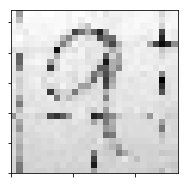

In [20]:
draw_digit(img_9_)

In [25]:
img_7 = Image.open('num_7.jpg')

In [27]:
img_7_ = convert_img(img_7)
draw_digit(img_7_)

C:\Users\Ritor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


In [28]:
pre = predict(model, img_7_)
ans = 7

print(pre)
if(pre == ans):
    print("OK")
else:
    print("NG")

3
NG


C:\Users\Ritor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


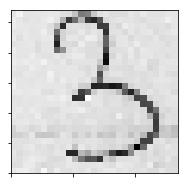

In [29]:
img_3 = Image.open('num_3.jpg')
img_3_ = convert_img(img_3)
draw_digit(img_3_)

In [30]:
pre = predict(model, img_3_)
ans = 3

print(pre)
if(pre == ans):
    print("OK")
else:
    print("NG")

3
OK


C:\Users\Ritor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


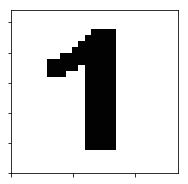

In [33]:
img_1 = Image.open('num_1_.jpg')
img_1_ = convert_img(img_1)
draw_digit(img_1_)

In [34]:
pre = predict(model, img_1_)
ans = 1

print(pre)
if(pre == ans):
    print("OK")
else:
    print("NG")

0
NG
